# PART A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.stats.multicomp as mc

In [2]:
list1 = [
    17.5, 18.0, 36.8, 31.7, 31.7,
    17.3, 24.3, 47.7, 38.5, 17.0,
    23.7, 16.5, 25.1, 17.4, 18.0,
    37.6, 19.7, 21.4, 28.6, 21.6,
    19.3, 20.0, 16.9, 25.2, 19.8,
    25.0, 17.2, 20.4, 20.1, 29.1,
    19.1, 25.2, 23.2, 25.9, 24.0,
    41.7, 24.0, 16.8, 26.8, 31.4,
    16.9, 17.2, 24.1, 35.2, 19.1,
    22.9, 18.2, 25.4, 35.4, 25.5
]


bmi = pd.Series(list1)
bmi.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: None
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [3]:
# Q1. Compute the mean, median and the mode of the data
print('Mean bmi  = ',round(bmi.mean(),2))
print('Median bmi= ',round(bmi.median(),2))
print('Mode :\n',round(bmi.mode(),2))

Mean bmi  =  24.42
Median bmi=  23.45
Mode :
 0    16.9
1    17.2
2    18.0
3    19.1
4    24.0
5    25.2
6    31.7
dtype: float64


In [4]:
# Q2. Compute the range , variance and standard deviation of  bmi

print('Range:',bmi.max() - bmi.min())
print('variance:',round(bmi.var(),2))
print("Standard Deviation:",round(bmi.std(),2))

Range: 31.200000000000003
variance: 54.56
Standard Deviation: 7.39


In [5]:
#Q3 Find the mean deviation for the data . The mean deviation is defined as below.
print(sum(abs(bmi - bmi.mean()))/len(bmi))

5.6424


In [6]:
# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

coe_ske = (3*(bmi.mean() - bmi.median()))/bmi.std()
coe_ske           

0.394772251719685

In [7]:
# the data is Positively skewed

In [8]:
#Q5. Count the number of data values that fall within two standard deviations of
# the mean. Compare this with the answer from Chebyshev’s Theorem.

bmi_mean = bmi.mean()
bmi_std = bmi.std()
data  = bmi[(bmi <= bmi_mean + 2 * (bmi_std)) & (bmi >= bmi_mean - 2 * (bmi_std))  ]
len(data)

48

In [9]:
percent = 1 - (1/(2**2))
percent 

0.75

In [10]:
len(data)/len(bmi)

0.96

In [11]:
# Chebyshev’s Theorem states that minimun values within 2 standard deviation ins 75 percent
# while the actual data within the 2 standard deviation is 96 percent Theorem they hold true

In [12]:
#Q6 Find the three quartiles and the interquartile range (IQR)
print('Q1:',bmi.quantile(0.25))
print('Q2:',bmi.quantile(0.5))
print('Q3:',bmi.quantile(0.75))

IQR = bmi.quantile(0.75) - bmi.quantile(0.25)
print('Interquartile Range :',IQR)

Q1: 18.425
Q2: 23.45
Q3: 26.575
Interquartile Range : 8.149999999999999


In [13]:
# Q7. Are there any outliers in the data set ?
ul = bmi.quantile(0.75) + (1.5 * IQR)
ll = bmi.quantile(0.25) - (1.5 * IQR)

print('Upper Limit:',ul)
print('Lower Limit:',ll)
outliers = bmi[((bmi>= ul) | (bmi <= ll))]
outliers

Upper Limit: 38.8
Lower Limit: 6.200000000000003


7     47.7
35    41.7
dtype: float64

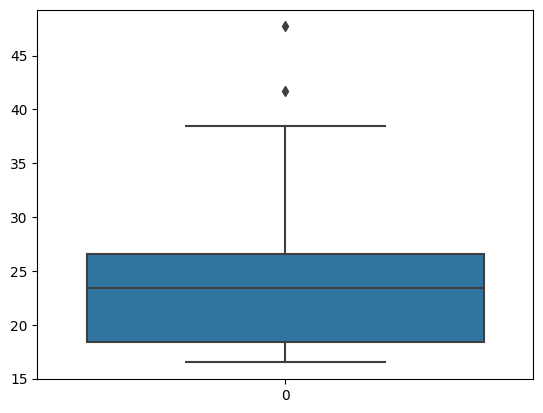

In [14]:
#Q8. Draw a boxplot of the dataset to confirm .
sns.boxplot(bmi)
plt.show()

In [15]:
#Q9 Find the percentile rank of the datapoint 25.0 .

stats.percentileofscore(bmi, 25.0)

62.0

In [16]:
# Q10. What is the probability that a young adult has a BMI above 25.0?


mean = bmi.mean()
std = bmi.std()
x = 25

print('The probability that a young adult has a BMI above 25.0: ',stats.norm.sf(x,mean,std))

The probability that a young adult has a BMI above 25.0:  0.46881440913336786


<Axes: ylabel='Count'>

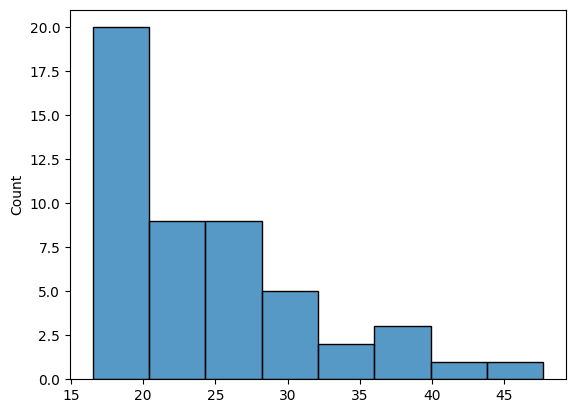

In [17]:
#Q11. Create a frequency distribution for the data and visualize it appropriately

sns.histplot(bmi)

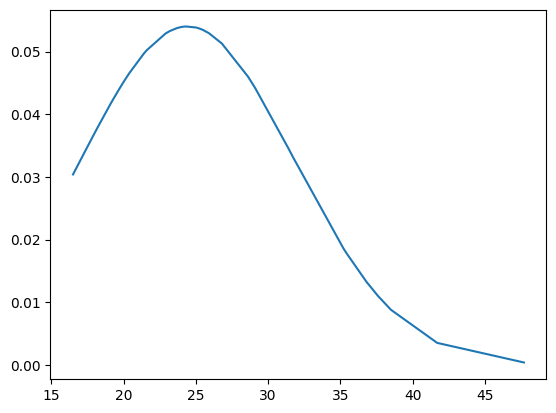

In [18]:
#Q12.Create a probability distribution of the data and visualize it appropriately.
pdf = stats.norm.pdf(bmi.sort_values(),bmi.mean(),bmi.std())
plt.plot(bmi.sort_values(),pdf)
plt.show()

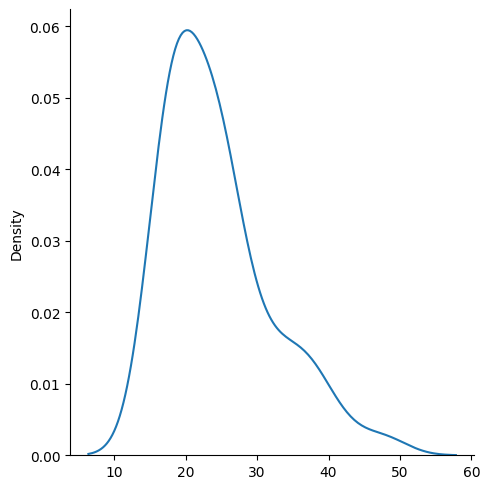

In [19]:
#Q13. What is the shape of the distribution of this dataset? Create an
# appropriate graph to determine that. Take 100 random samples with
# replacement from this dataset of size 5 each. Create a sampling distribution of
# the mean bmi of yound adults. Compare with other sampling distributions of
# sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
# the Central Limit Theorem?

# It is an almost a normally distribution dataset
sns.displot(bmi,kind='kde')

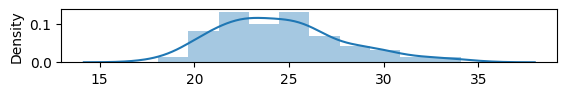

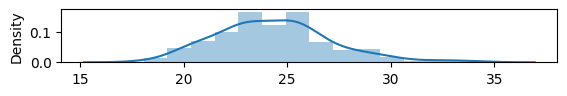

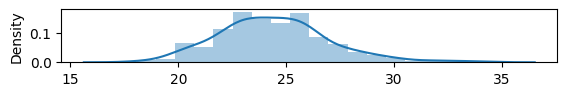

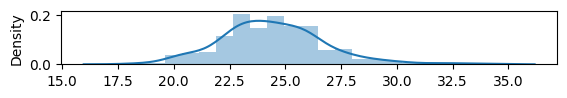

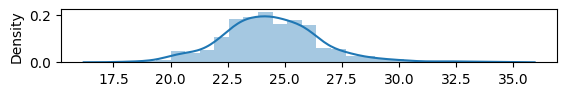

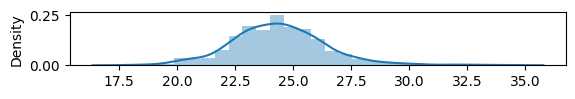

In [20]:
random.seed(0)
n_samples = 100
sample_means = []
size = [5,10, 15, 20, 25, 30]
for x,y in enumerate(size):
    for i in range(n_samples):
        sample= random.choices(bmi ,k = y ) 
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    plt.subplot(len(size),1,x+1)
    sns.distplot(sample_means)
    plt.show()

In [21]:
# as the sampel size increases the distribution of the sample mean becomes normal. It reaches mormal ditribution when n > 30 

In [22]:
# Q14. Treat this dataset as a binomial distribution where p is the probability that a young 
# adult has a BMI above 25.0. What is the probability that out of a random sample of 
# 10 young adults exactly 6 are having BMI greater than 25.0?

mean = bmi.mean()
std = bmi.std()
x = 25
p  = stats.norm.sf(x,mean,std)
print('The probability that a young adult has a BMI above 25.0: :',p)

n = 10
i = 6

stats.binom.pmf(i,n,p)

The probability that a young adult has a BMI above 25.0: : 0.46881440913336786


0.17750481805588114

In [23]:
# Q15.A study claims that 40% of all young adults have BMI greater than 25.0. Using the Normal 
# approximation of a Binomial distribution, find the probability that in a random sample of 
# 100 young adults exactly 50 of them will have will have a BMI is greater than 25.0.
# [ Note that the normal distribution can be used to approximate a binomial distribution 
#  if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]


p= 0.40

n = 100

n_p = n * p
print(n_p)

n_q = n*(1-p)
print(n_q)

x = 50

sigma = np.sqrt(n*p*(1-p))
sigma


x1 = (x-0.5)
x2 = (x+0.5)

z1 = (x1-(n_p))/sigma
z2 = (x2-(n_p))/sigma


print('Probability than out of 100 exactly 50 of them will  have a BMI is greater than 25.0: ',round((stats.norm.cdf(z2) - stats.norm.cdf(z1)),4))

#stats.binom.pmf(50,100,0.40) finding the probaility as Binomial distribution without normal apporximation

40.0
60.0
Probability than out of 100 exactly 50 of them will  have a BMI is greater than 25.0:  0.0102


In [24]:
# Q16. Compute a 95% Confidence Interval for the true BMI of the population of young adults 
#using appropriate distribution.( State reasons as to why did you use a z or t distribution)

n = len(bmi)
n

50

 Since the sample size is greater than 30.The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

In [25]:
n = len(bmi)
x_bar = bmi.mean()
s = bmi.std()

In [26]:
z_alpha_by_2  = stats.norm.isf(0.025)

num1 = x_bar - (z_alpha_by_2 *(s/np.sqrt(n)))

num2 = x_bar + (z_alpha_by_2 *(s/np.sqrt(n)))

print('Interval : [', num1,',', num2,']')

Interval : [ 22.374593914998236 , 26.469406085001758 ]


In [27]:
# Q17. A data scientist wants to estimate with 95% confidence the proportion of young adults having
# BMI greater than 25.0. A recent study showed that 40% of all young adults have BMI greater than
# 25.0. The data scientist wants to be accurate within 2% of the true proportion. 
# Find the minimum sample size necessary.


p =0.40
margin_of_error = 0.02
alpha = 0.05


z_alpha_by_2  = stats.norm.isf(alpha/2)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 2305


In [28]:
# Q18. The same data scientist wants to estimate the true proportion of young adults having BMI 
# greater than 25.0. She wants to be 90% confident and accurate within 5% of true proportion. 
# Find the minimum sample size necessary.

p =0.40
margin_of_error = 0.05
alpha = 0.10


z_alpha_by_2  = stats.norm.isf(alpha/2)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 260


Q19. A researcher claims that currently 55% of all young adults have BMI greater than 25 . Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only 20 are having BMI above 25

In [29]:
# assume that the samples are normal 

p_pop =  0.55
p_samp = 20/30
n= 30
alpha  = 0.05

# ho : Young adult whose BMI greater than 25  p_pop = 0.55
# h1 : Young adult whose BMI greater than 25 p_pop != 0.55

z_prop = (p_samp - p_pop) / ((p_pop)*(1 - p_pop)/n)**0.5
z_prop

1.284457725980753

In [30]:
zcritical = stats.norm.isf(0.025)
zcritical

1.9599639845400545

In [31]:
p_value = 2*(stats.norm.sf(abs(z_prop)))
p_value

0.19898184599724278

In [32]:
# pvalue > alpha
# fail to reject Null hypothesis
# 55% of Young adults have BMI greater than 25

Q 20. A data scientist is researching the hypothesis that there is no difference between BMI of public vs private schools students. So he collects data from the two schools and finds that the proportion of public school students whose BMI is above 25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got these values after interviewing 500 students of each school.  

            a. What hypothesis would he use to compare the proportions of students having BMI greater than 25.0 among both the schools.   
            b. What are critical values to be used?  
            c. What statistical test will be used to compare these proportions ?  
            d. Complete the test and obtain the P-value.  
            e. Summarize his conclusion based on the P-value.  

In [33]:
#a)  a. What hypothesis would he use to compare the proportions of students having 
# BMI greater than 25.0 among both the schools.  

# ho:   p_pop1 = p_pop2  there is no difference between BMI of public vs private schools students
# h1 :  p_pop1 != p_pop2 there is difference between BMI of public vs private schools students

In [34]:
# b. What are critical values to be used? 
# let us take the significane level of 0.05
alpha = 0.05
z_critical = stats.norm.isf(alpha/2)
z_critical

1.9599639845400545

In [35]:
# C)we will use two sample two tailed z proportion test
# d) approach 1 
n1=n2 = 500
prop1 = 0.318
prop2 = 0.387

proportions_ztest(count = [prop1*n1,prop2*n2], nobs = [n1,n2],alternative='two-sided')


(-2.283597968755619, 0.022395169275568342)

In [36]:
# approach 2
n1=n2 = 500
prop1 = 0.318
prop2 = 0.387



pbar = ((n1 * prop1) + (n2 * prop2)) /(n1+n2)


den = ((pbar*(1-pbar)) * ((1/n1) + (1/n2))) **0.5

zprop = (prop1 - prop2)/den 
zprop

-2.283597968755619

In [37]:
p_value = 2*(stats.norm.sf(abs(zprop)))
p_value

0.022395169275568342

In [38]:
#p-value = 0.022
# alpha = 0.05
# pvalue < alpha
# reject Ho
# there is difference between BMI of public vs private schools students

# PART B

In [39]:
df = pd.read_csv('fifa.csv')
meta = pd.read_csv('fifa_ variable_information.csv',header=None)
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Photo                     25490 non-null  object 
 4   Nationality               25490 non-null  object 
 5   Flag                      25490 non-null  object 
 6   Overall                   25490 non-null  int64  
 7   Potential                 25490 non-null  int64  
 8   Club                      25159 non-null  object 
 9   Club Logo                 25490 non-null  object 
 10  Value                     25490 non-null  object 
 11  Wage                      25490 non-null  object 
 12  Preferred Foot            25425 non-null  object 
 13  International Reputation  25425 non-null  float64
 14  Weak F

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


In [40]:
meta

,0,1
0,ID,unique id for every player
1,Name,name
2,Age,age
3,Photo,url to the player's photo
4,Nationality,nationality
5,Flag,url to players's country flag
6,Overall,overall rating
7,Potential,potential rating
8,Club,current club
9,Club Logo,url to club logo


In [41]:
# Dropping Unnecessary COlumns

In [42]:
df = df[['ID','Name','Age','Nationality','Overall','Potential','Club','Value','Wage','Joined','Preferred Foot',
'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause','International Reputation', 'Position']]

In [43]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,€220K,€1K,"Jun 8, 2017",Right,2019,6'1,161lbs,58.0,€429K,1.0,LS
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,€925K,€16K,"Aug 23, 2018",Right,2019,6'2,172lbs,57.0,€1.8M,2.0,CM
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,€5M,€46K,"Aug 23, 2017",Right,2022,6'5,198lbs,41.0,€9.6M,1.0,GK
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,€3.8M,€6K,"Jan 11, 2018",Right,2018,5'3,121lbs,71.0,€6.1M,1.0,CAM
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,€120K,€1K,"Jul 1, 2016",Right,2020,6'1,176lbs,15.0,€198K,1.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,207559,S. Tibbling,23,Sweden,73,79,Brøndby IF,€5.5M,€19K,"Jul 21, 2017",Right,2022,5'9,163lbs,52.0,€8.3M,1.0,LCM
25486,205157,Ruiz de Galarreta,24,Spain,70,75,UD Las Palmas,€2.3M,€6K,"Aug 7, 2018",Right,2022,5'9,152lbs,47.0,€3.9M,1.0,RCM
25487,188802,M. Schmelzer,30,Germany,77,77,Borussia Dortmund,€6.5M,€43K,"Jul 1, 2008",Left,2021,5'11,163lbs,46.0,€11.1M,2.0,LB
25488,244464,E. Castillo,23,Ecuador,66,75,Club Tijuana,€1M,€6K,"Jul 10, 2018",Right,2021,5'10,152lbs,62.0,€1.9M,1.0,LS


Data Cleaning and Wrangling

In [44]:
df.Value = df.Value.str.strip('€')
df.Value = df.Value.apply(lambda x : float(x.replace("M",''))*1000000 if 'M' in x else float(x.replace("K",''))*1000 if 'K' in x else x).astype('float')

In [45]:
df.Wage = df.Wage.str.strip('€')
df.Wage = df.Wage.apply(lambda x : float(x.replace("M",''))*1000000 if 'M' in x else float(x.replace("K",''))*1000 if 'K' in x else x).astype('float')

In [46]:

df['Release Clause'] = df['Release Clause'].str.strip('€')


In [47]:
df['Release Clause'] = df['Release Clause'].apply(lambda x : float(x.replace("M",''))*1000000 if 'M' in str(x) else float(x.replace("K",''))*1000 if 'K' in str(x) else x).astype('float')

In [48]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220000.0,1000.0,"Jun 8, 2017",Right,2019,6'1,161lbs,58.0,429000.0,1.0,LS
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925000.0,16000.0,"Aug 23, 2018",Right,2019,6'2,172lbs,57.0,1800000.0,2.0,CM
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5000000.0,46000.0,"Aug 23, 2017",Right,2022,6'5,198lbs,41.0,9600000.0,1.0,GK
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,3800000.0,6000.0,"Jan 11, 2018",Right,2018,5'3,121lbs,71.0,6100000.0,1.0,CAM
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120000.0,1000.0,"Jul 1, 2016",Right,2020,6'1,176lbs,15.0,198000.0,1.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,207559,S. Tibbling,23,Sweden,73,79,Brøndby IF,5500000.0,19000.0,"Jul 21, 2017",Right,2022,5'9,163lbs,52.0,8300000.0,1.0,LCM
25486,205157,Ruiz de Galarreta,24,Spain,70,75,UD Las Palmas,2300000.0,6000.0,"Aug 7, 2018",Right,2022,5'9,152lbs,47.0,3900000.0,1.0,RCM
25487,188802,M. Schmelzer,30,Germany,77,77,Borussia Dortmund,6500000.0,43000.0,"Jul 1, 2008",Left,2021,5'11,163lbs,46.0,11100000.0,2.0,LB
25488,244464,E. Castillo,23,Ecuador,66,75,Club Tijuana,1000000.0,6000.0,"Jul 10, 2018",Right,2021,5'10,152lbs,62.0,1900000.0,1.0,LS


In [49]:
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

In [50]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'],format='mixed',yearfirst=True)

In [51]:
df.Height = df.Height.str.replace('\'' ,'.').astype('float')

In [52]:
df.Weight = df.Weight.str.strip('lbs').astype('float')

Treating data For Duplicates

In [53]:
print('Total Duplicate Values:',df.duplicated().sum())

Total Duplicate Values: 11833


In [54]:
# drop the duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13657 entries, 0 to 25489
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        13657 non-null  int64         
 1   Name                      13657 non-null  object        
 2   Age                       13657 non-null  int64         
 3   Nationality               13657 non-null  object        
 4   Overall                   13657 non-null  int64         
 5   Potential                 13657 non-null  int64         
 6   Club                      13472 non-null  object        
 7   Value                     13657 non-null  float64       
 8   Wage                      13657 non-null  float64       
 9   Joined                    12493 non-null  float64       
 10  Preferred Foot            13621 non-null  object        
 11  Contract Valid Until      13436 non-null  datetime64[ns]
 12  Height                 

In [55]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation
count,13657.000000,13657.000000,13657.000000,13657.000000,1.365700e+04,13657.000000,12493.000000,13436,13621.00000,13621.000000,13621.000000,1.248600e+04,13621.000000
mean,214471.937907,25.082595,66.205023,71.307022,2.392080e+06,9646.188768,2016.459137,2020-03-07 07:23:29.348020480,5.79751,166.010719,48.573086,4.527101e+06,1.110344
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1991.000000,2018-01-01 00:00:00,5.10000,110.000000,5.000000,1.300000e+04,1.000000
25%,200505.000000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,2016.000000,2019-01-01 00:00:00,5.11000,154.000000,39.000000,5.280000e+05,1.000000
50%,221855.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,2017.000000,2020-01-01 00:00:00,5.90000,165.000000,50.000000,1.100000e+06,1.000000
75%,236675.000000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,2018.000000,2021-01-01 00:00:00,6.10000,176.000000,60.000000,3.500000e+06,1.000000
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,455000.000000,2018.000000,2026-01-01 00:00:00,6.90000,243.000000,90.000000,2.281000e+08,5.000000
std,29868.556965,4.644942,6.901866,6.114532,5.545819e+06,21880.283501,2.119364,NaN,0.44878,15.595479,15.714240,1.091556e+07,0.388449


In [56]:
df.describe(include = 'object')

,Name,Nationality,Club,Preferred Foot,Position
count,13657,13657,13472,13621,13610
unique,13053,160,651,2,27
top,J. Rodríguez,England,AS Monaco,Right,ST
freq,8,1244,29,10447,1575


Checking for Variation In variable s

In [57]:
df.select_dtypes('number').drop(columns = 'ID').var()

Age                         2.157549e+01
Overall                     4.763576e+01
Potential                   3.738750e+01
Value                       3.075610e+13
Wage                        4.787468e+08
Joined                      4.491706e+00
Height                      2.014039e-01
Weight                      2.432190e+02
Penalties                   2.469373e+02
Release Clause              1.191494e+14
International Reputation    1.508923e-01
dtype: float64

In [58]:
df.select_dtypes('number').drop(columns = 'ID').std()

Age                         4.644942e+00
Overall                     6.901866e+00
Potential                   6.114532e+00
Value                       5.545819e+06
Wage                        2.188028e+04
Joined                      2.119364e+00
Height                      4.487805e-01
Weight                      1.559548e+01
Penalties                   1.571424e+01
Release Clause              1.091556e+07
International Reputation    3.884485e-01
dtype: float64

In [59]:
# Coefficient of Variation
pd.Series(stats.variation(df.select_dtypes('number'),nan_policy='omit') ,index=df.select_dtypes('number').columns)

ID                          0.139260
Age                         0.185179
Overall                     0.104246
Potential                   0.085746
Value                       2.318324
Wage                        2.268200
Joined                      0.001051
Height                      0.077406
Weight                      0.093939
Penalties                   0.323506
Release Clause              2.411062
International Reputation    0.349832
dtype: float64

Joined                      0.001051  
Height                      0.077406  
Weight                      0.093939  

They have least Variation Coefficient hence they are not needed for model building

## Missing Values Treatment

In [60]:
df.isnull().sum()/df.shape[0] *100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.354617
Value                       0.000000
Wage                        0.000000
Joined                      8.523102
Preferred Foot              0.263601
Contract Valid Until        1.618218
Height                      0.263601
Weight                      0.263601
Penalties                   0.263601
Release Clause              8.574357
International Reputation    0.263601
Position                    0.344146
dtype: float64

In [61]:
df.select_dtypes('number').skew()

ID                         -2.280133
Age                         0.392436
Overall                     0.070052
Potential                   0.261056
Value                       7.171178
Wage                        7.700104
Joined                     -2.606695
Height                     -0.547125
Weight                      0.227965
Penalties                  -0.370138
Release Clause              7.156441
International Reputation    4.104687
dtype: float64

In [62]:
df.select_dtypes('number').kurt()

ID                           9.765368
Age                         -0.457802
Overall                      0.093175
Potential                    0.012374
Value                       79.442277
Wage                        91.029977
Joined                      10.906320
Height                      -1.045730
Weight                       0.115159
Penalties                   -0.341120
Release Clause              78.236360
International Reputation    19.371577
dtype: float64

BoxPlot of Age


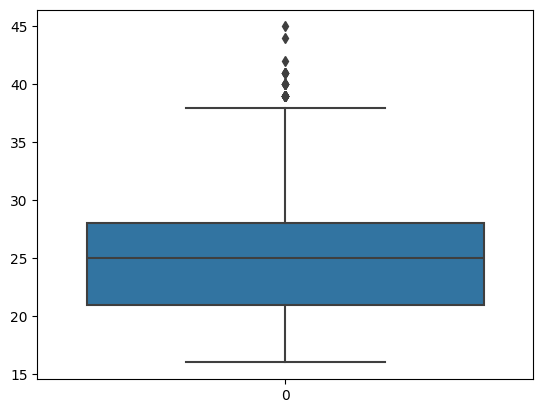

BoxPlot of Overall


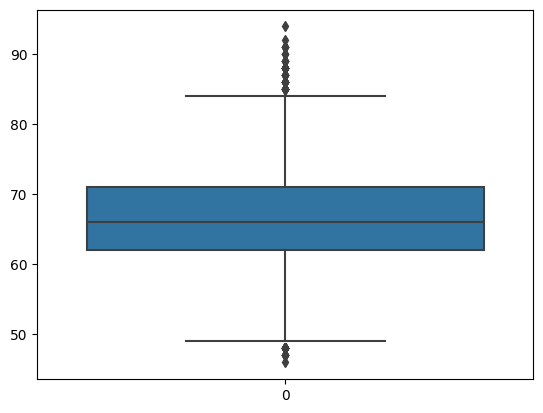

BoxPlot of Potential


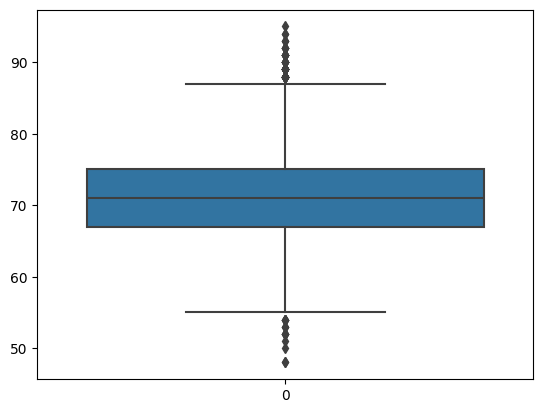

BoxPlot of Value


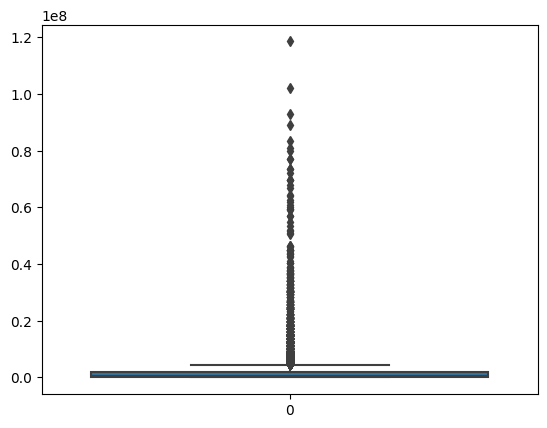

BoxPlot of Wage


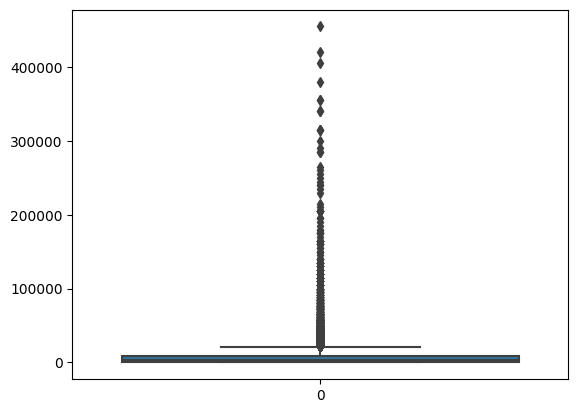

BoxPlot of Joined


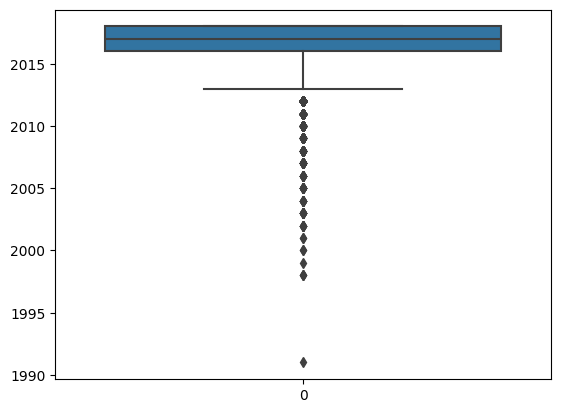

BoxPlot of Height


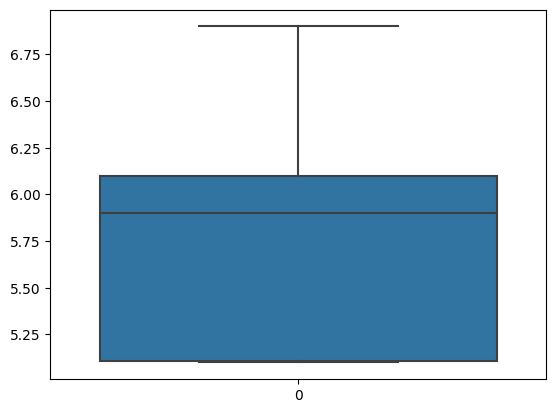

BoxPlot of Weight


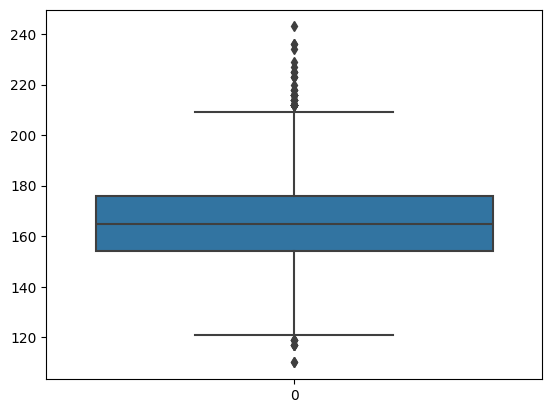

BoxPlot of Penalties


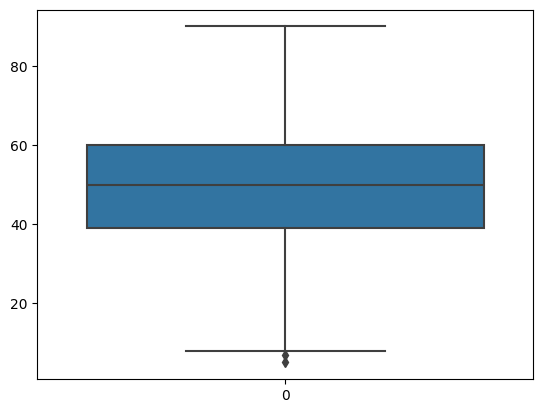

BoxPlot of Release Clause


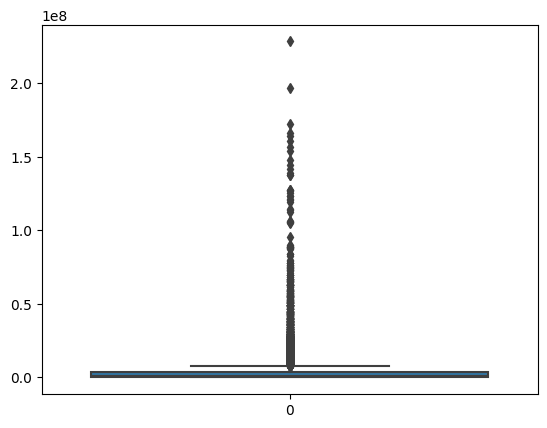

BoxPlot of International Reputation


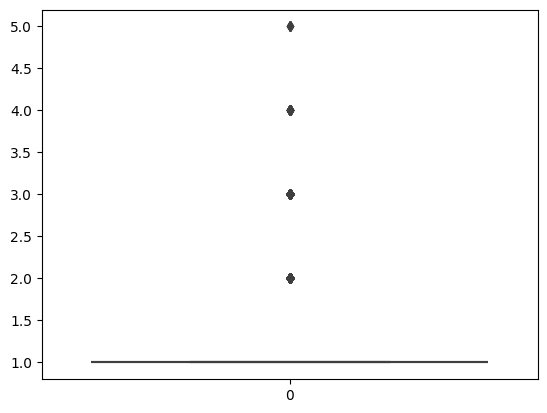

In [63]:
for x in df.drop(columns='ID').select_dtypes('number').columns:
    print('BoxPlot of',x)
    sns.boxplot(df[x])
    plt.show()

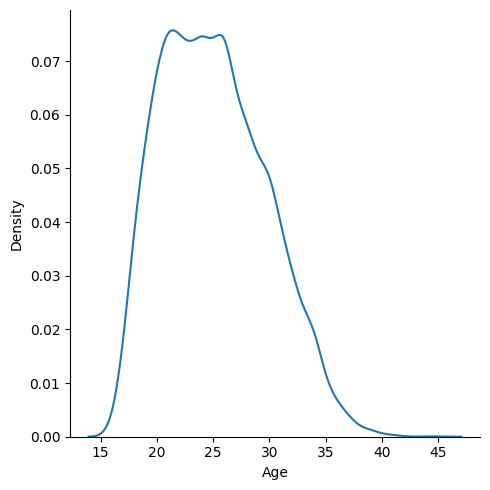

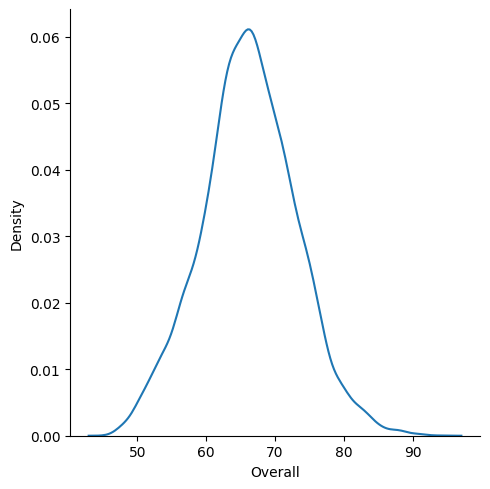

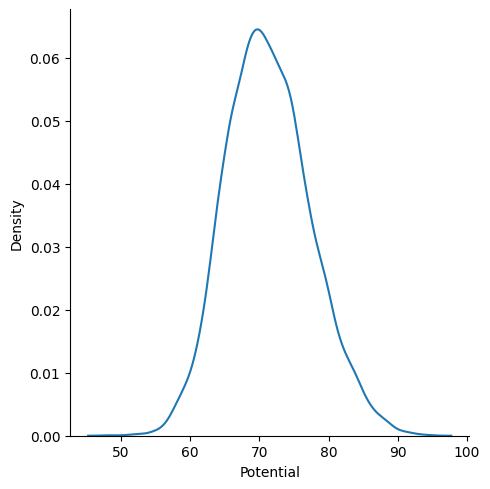

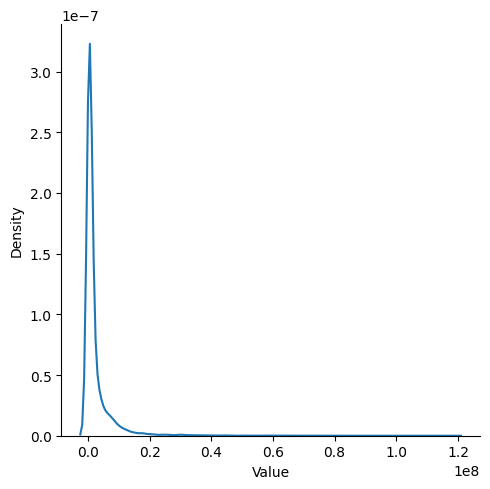

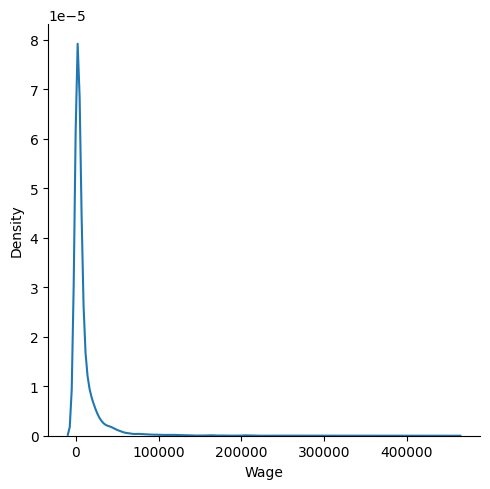

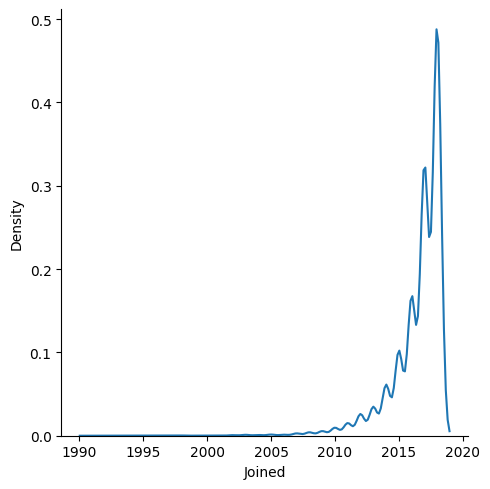

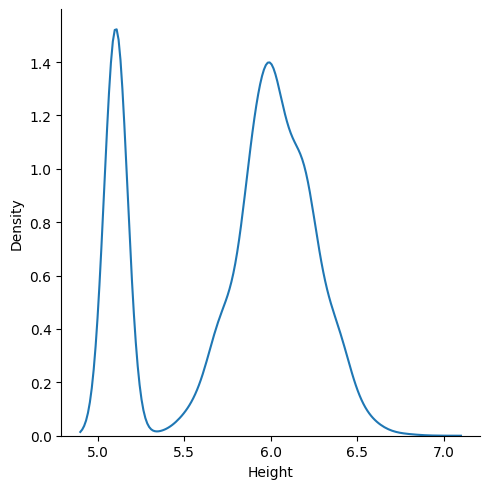

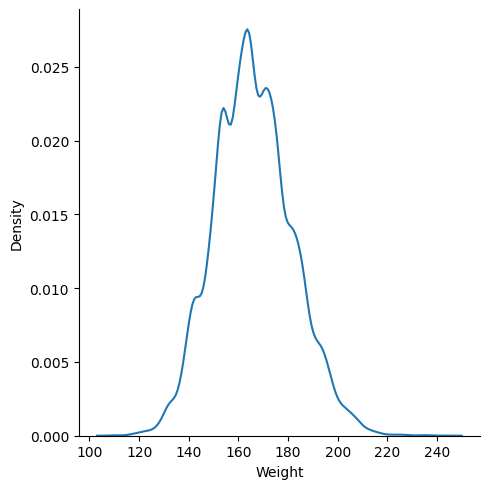

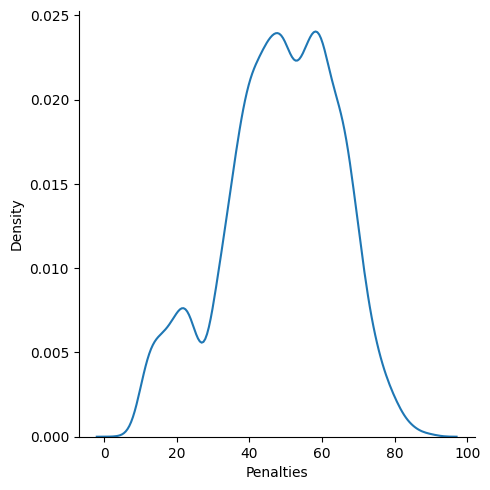

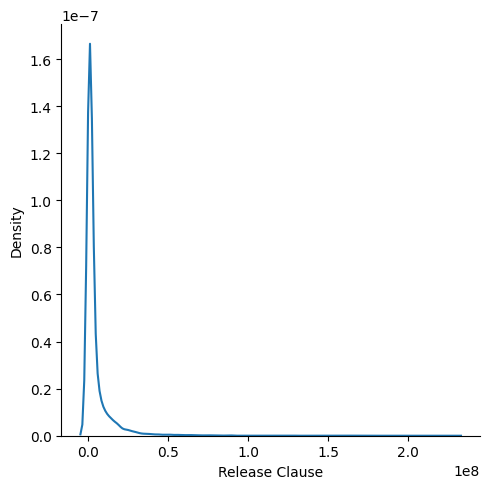

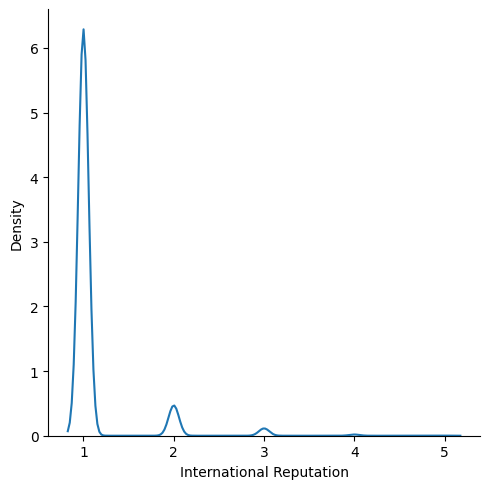

In [64]:
for x in df.drop(columns='ID').select_dtypes('number').columns:
    sns.displot(df[x],kind = 'kde')
    plt.show()

In [65]:
df.Club.fillna('Not Known',inplace=True)

In [66]:
df.Position.fillna(df.Position.mode()[0],inplace=True)

In [67]:
df['Height'].fillna(df["Height"].median(),inplace=True)
df['Weight'].fillna(df["Weight"].median(),inplace=True)
df['Penalties'].fillna(df["Penalties"].median(),inplace=True)
df['Penalties'].fillna(df["Penalties"].median(),inplace=True)
df['Release Clause'].fillna(df["Release Clause"].median(),inplace=True)
df['Joined'].fillna(df["Joined"].median(),inplace=True)

In [68]:
df.dropna(subset=['International Reputation','Contract Valid Until'],inplace=True)

In [69]:
whiskers = {}
for x in df.drop(columns='ID').select_dtypes('number').columns:
    q1  = df[x].quantile(0.25)
    q2  = df[x].quantile(0.5)
    q3  = df[x].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 2*iqr
    ll = q1 - 2*iqr
    whiskers[x] = [ll,ul]
print(whiskers)

{'Age': [7.0, 42.0], 'Overall': [44.0, 89.0], 'Potential': [51.0, 91.0], 'Value': [-3225000.0, 5650000.0], 'Wage': [-15000.0, 25000.0], 'Joined': [2012.0, 2022.0], 'Height': [3.1300000000000017, 8.079999999999998], 'Weight': [110.0, 220.0], 'Penalties': [-3.0, 102.0], 'Release Clause': [-4311000.0, 7874000.0], 'International Reputation': [1.0, 1.0]}


In [70]:
# let us take Overall rating 
df[(df.Overall < whiskers['Overall'][0] ) |(df.Overall > whiskers['Overall'][1] )]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position
963,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2012.0,Right,2020-01-01,5.80,163.0,86.0,172100000.0,4.0,LF
1899,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2018.0,Right,2022-01-01,6.20,183.0,85.0,127100000.0,5.0,ST
5099,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2014.0,Right,2021-01-01,6.00,190.0,85.0,164000000.0,5.0,RS
5489,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2015.0,Right,2023-01-01,5.11,154.0,79.0,196400000.0,4.0,RCM
6088,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2017.0,Right,2022-01-01,5.90,150.0,81.0,228100000.0,5.0,LW
6869,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2012.0,Right,2020-01-01,5.80,146.0,82.0,137400000.0,4.0,RCM
15989,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2005.0,Right,2020-01-01,6.00,181.0,75.0,104600000.0,4.0,RCB
16245,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,2014.0,Right,2021-01-01,6.20,192.0,11.0,144500000.0,3.0,GK
18119,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,2014.0,Right,2021-01-01,6.00,176.0,88.0,127100000.0,4.0,ST
20448,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,2011.0,Right,2020-01-01,6.40,168.0,40.0,138600000.0,4.0,GK


In [71]:
# Cardinality Problem
for x in df.select_dtypes('object').columns:
    print('Column:',x,'\n',df[x].unique().shape[0])
# It exist for Nationality and CLub since too many Categories are present in each variable

Column: Name 
 12843
Column: Nationality 
 159
Column: Club 
 651
Column: Preferred Foot 
 2
Column: Position 
 27


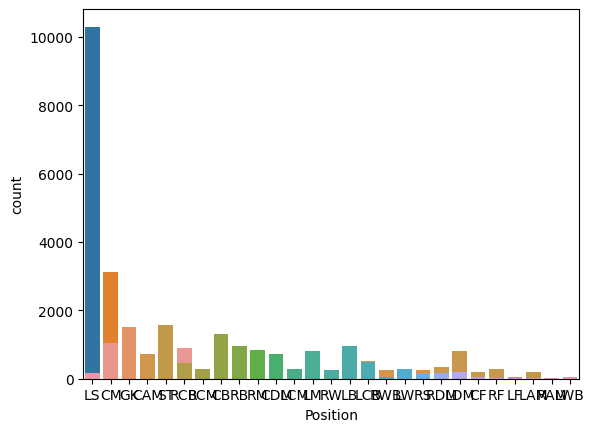

In [72]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
plt.show()

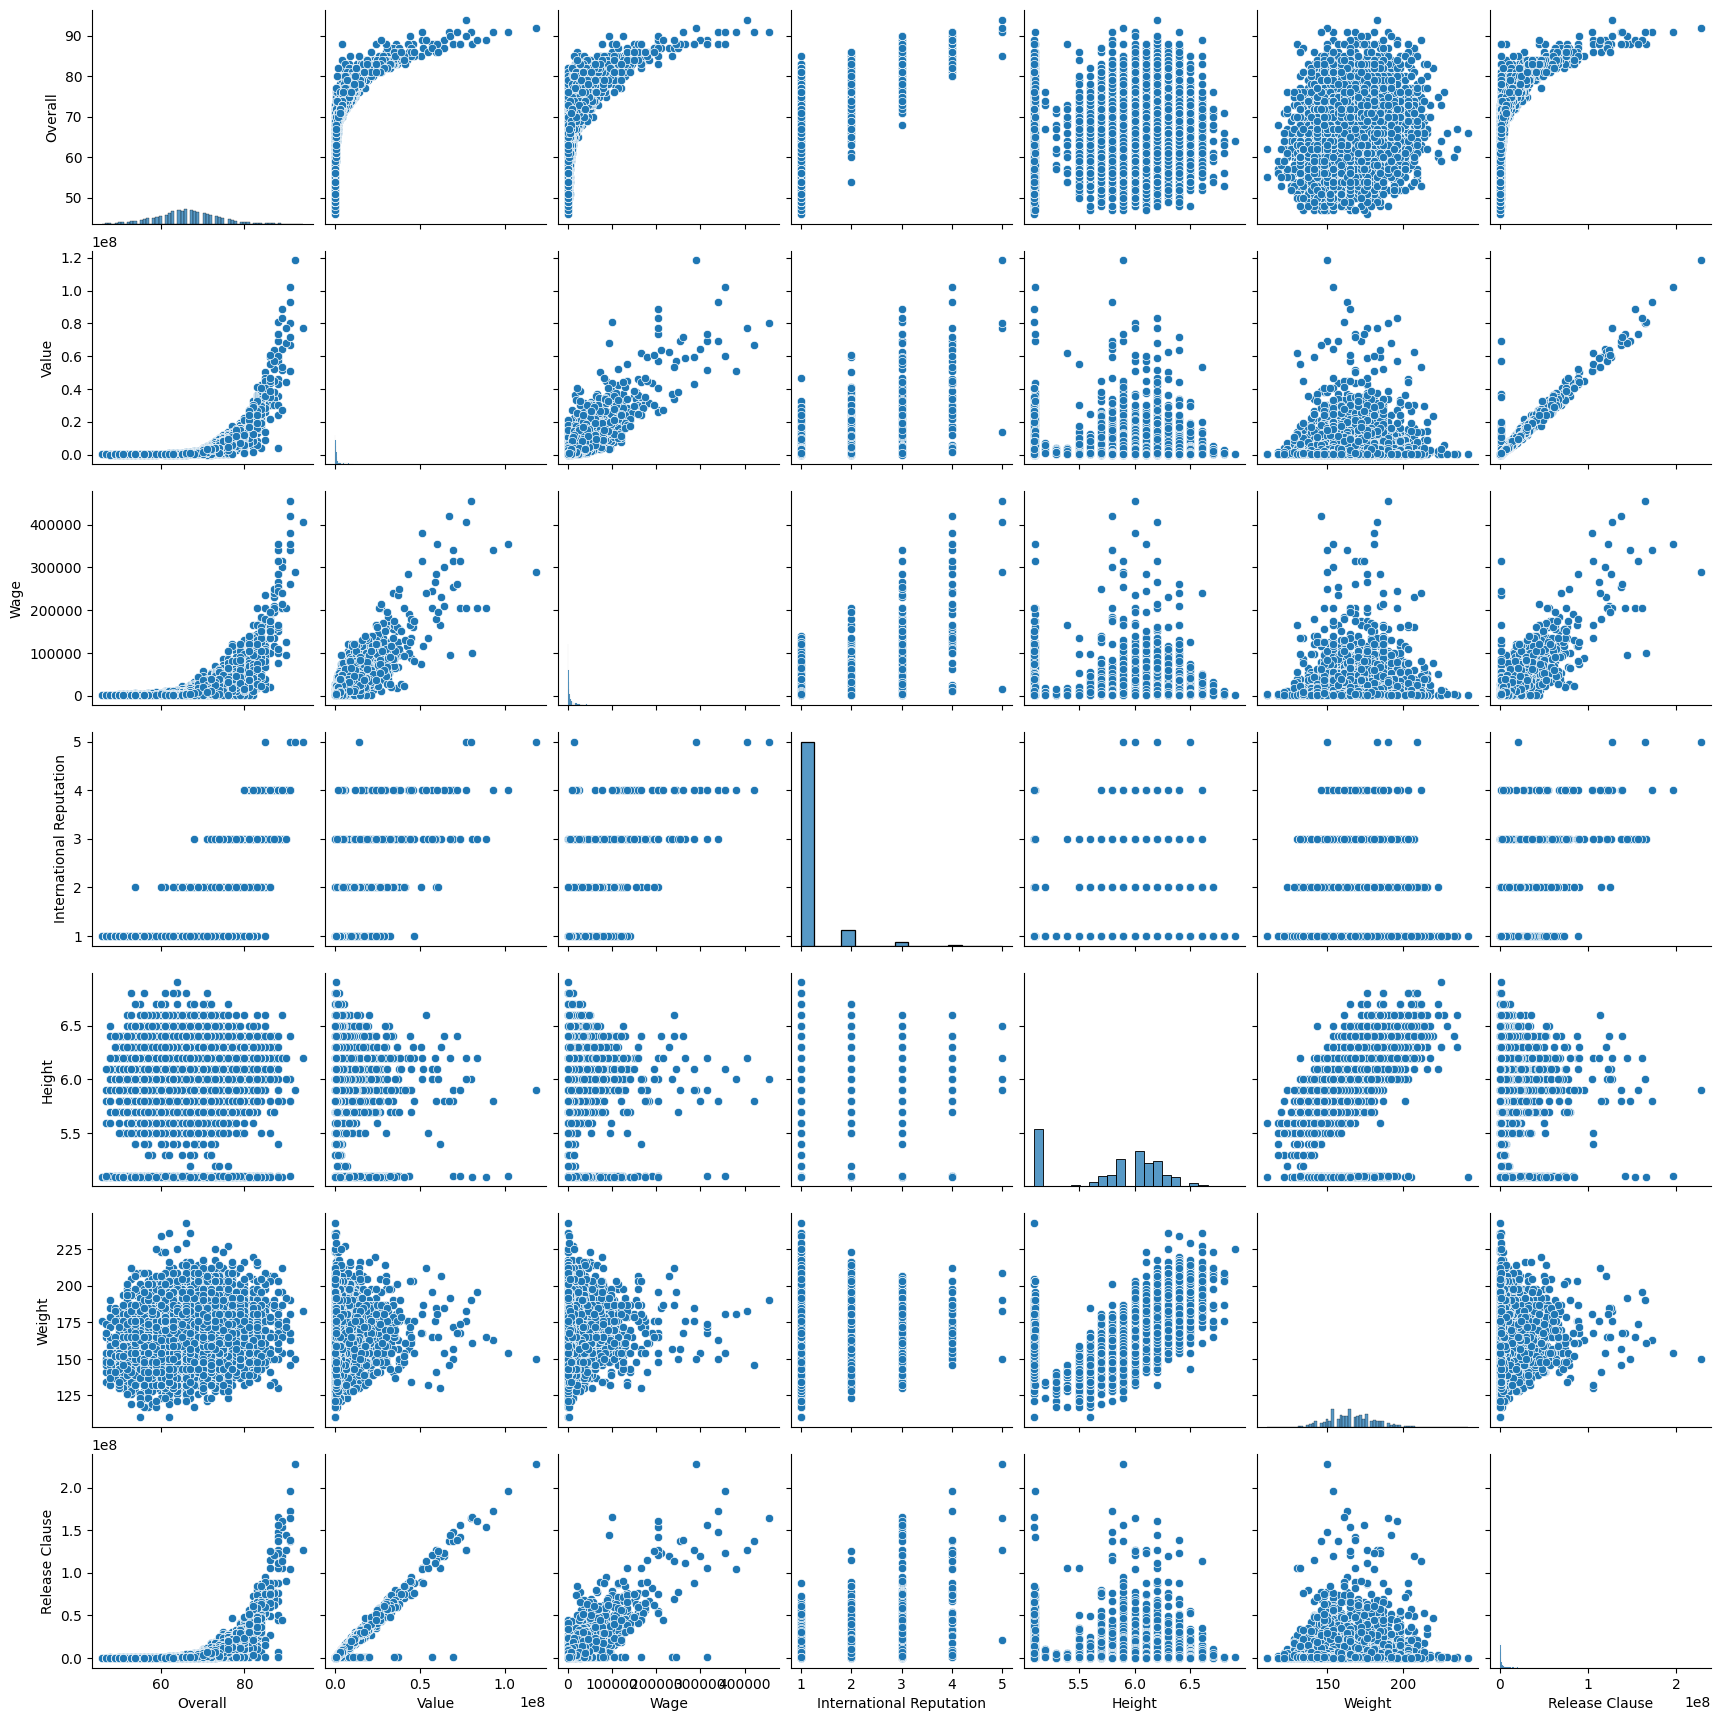

In [73]:
sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

## Creating Table for Top 20 Players

In [74]:
top20 = df[df['Contract Valid Until'].dt.year == 2020].sort_values(by = 'Overall',ascending =False).head(20)
top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position
15989,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2005.0,Right,2020-01-01,6.00,181.0,75.0,104600000.0,4.0,RCB
6869,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2012.0,Right,2020-01-01,5.80,146.0,82.0,137400000.0,4.0,RCM
20448,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,2011.0,Right,2020-01-01,6.40,168.0,40.0,138600000.0,4.0,GK
963,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2012.0,Right,2020-01-01,5.80,163.0,86.0,172100000.0,4.0,LF
20440,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,2005.0,Left,2020-01-01,6.20,187.0,50.0,44600000.0,4.0,LCB
13954,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,2012.0,Right,2020-01-01,6.00,181.0,60.0,44400000.0,4.0,RCB
5874,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,2013.0,Right,2020-01-01,5.11,168.0,67.0,141500000.0,3.0,CAM
9293,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,2013.0,Right,2020-01-01,5.70,134.0,79.0,76500000.0,3.0,RF
8867,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,2012.0,Left,2020-01-01,5.70,150.0,59.0,77900000.0,3.0,LB
13876,193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500000.0,195000.0,2014.0,Right,2020-01-01,6.10,176.0,25.0,62500000.0,3.0,GK


In [75]:
top20.Wage.mean()

181050.0

In [76]:
top20.Age.mean()

30.25

3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, also explain why this kind of relationship could happen.

<Axes: xlabel='Overall', ylabel='Value'>

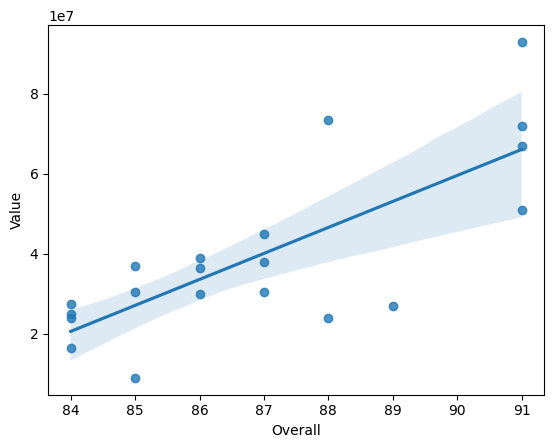

In [77]:
sns.regplot(x=top20.Overall,y=top20.Value)

In [78]:
top20.Overall.corr(top20.Value)

0.7655219227807243

## Table for 5 Players for each Position
Generate tables containing the top 5 players by Overall rating for each unique position.

In [88]:
df['Rank'] = df.groupby('Position')['Overall'].rank(ascending=False,method='first')

In [90]:
top_5 = df[df.Rank.isin([1,2,3,4,5])].sort_values(by=['Position','Rank'])

In [91]:
top_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position,Rank
5874,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,2013.0,Right,2020-01-01,5.11,168.0,67.0,141500000.0,3.0,CAM,1.0
10841,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,2013.0,Left,2021-01-01,5.11,168.0,67.0,82700000.0,4.0,CAM,2.0
14052,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,2008.0,Right,2021-01-01,6.10,165.0,60.0,74300000.0,4.0,CAM,3.0
4675,181872,A. Vidal,31,Chile,85,85,FC Barcelona,26000000.0,205000.0,2018.0,Right,2021-01-01,5.11,165.0,81.0,53300000.0,4.0,CAM,4.0
19850,178518,R. Nainggolan,30,Belgium,85,85,Inter,35500000.0,105000.0,2018.0,Right,2022-01-01,5.90,170.0,63.0,60400000.0,3.0,CAM,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2018.0,Right,2022-01-01,6.20,183.0,85.0,127100000.0,5.0,ST,1.0
18119,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,2014.0,Right,2021-01-01,6.00,176.0,88.0,127100000.0,4.0,ST,2.0
2644,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,2011.0,Right,2021-01-01,5.80,154.0,83.0,119300000.0,4.0,ST,3.0
14464,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,2010.0,Right,2024-01-01,6.20,196.0,90.0,160700000.0,3.0,ST,4.0


1. Are there any players appearing at more than one table? Please point out such players.

In [92]:
pd.merge(top20,top_5,how = 'inner',on='ID')

,ID,Name_x,Age_x,Nationality_x,Overall_x,Potential_x,Club_x,Value_x,Wage_x,Joined_x,...,Joined_y,Preferred Foot_y,Contract Valid Until_y,Height_y,Weight_y,Penalties_y,Release Clause_y,International Reputation_y,Position_y,Rank
0,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2005.0,...,2005.0,Right,2020-01-01,6.00,181.0,75.0,104600000.0,4.0,RCB,1.0
1,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2012.0,...,2012.0,Right,2020-01-01,5.80,146.0,82.0,137400000.0,4.0,RCM,2.0
2,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,2011.0,...,2011.0,Right,2020-01-01,6.40,168.0,40.0,138600000.0,4.0,GK,1.0
3,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2012.0,...,2012.0,Right,2020-01-01,5.80,163.0,86.0,172100000.0,4.0,LF,1.0
4,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,2005.0,...,2005.0,Left,2020-01-01,6.20,187.0,50.0,44600000.0,4.0,LCB,1.0
5,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,2012.0,...,2012.0,Right,2020-01-01,6.00,181.0,60.0,44400000.0,4.0,RCB,2.0
6,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,2013.0,...,2013.0,Right,2020-01-01,5.11,168.0,67.0,141500000.0,3.0,CAM,1.0
7,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,2013.0,...,2013.0,Right,2020-01-01,5.70,134.0,79.0,76500000.0,3.0,RF,1.0
8,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,2012.0,...,2012.0,Left,2020-01-01,5.70,150.0,59.0,77900000.0,3.0,LB,2.0
9,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,2014.0,...,2014.0,Right,2020-01-01,6.20,207.0,41.0,49500000.0,3.0,CB,3.0


2. What is the average wage one can expect to pay for the top 5 in every position?

In [93]:
top_5.groupby('Position')['Wage'].mean()

Position
CAM    168000.0
CB     139600.0
CDM    179400.0
CF      42000.0
CM     122800.0
GK     164200.0
LAM     81800.0
LB     175600.0
LCB    158200.0
LCM     93200.0
LDM    105800.0
LF     123200.0
LM     131200.0
LS     114200.0
LW     261000.0
LWB     33800.0
RAM     46600.0
RB     136000.0
RCB    219000.0
RCM    218600.0
RDM    105000.0
RF      38600.0
RM     134000.0
RS     133800.0
RW     163200.0
RWB     41200.0
ST     294000.0
Name: Wage, dtype: float64

## Statistical Analysis:

1. Test statistically whether the Left-leg player’s overall rating is higher than the
Right-leg overall score. Alpha = 0.05

In [94]:
right_foot_overall = df[df['Preferred Foot'] == 'Right'].Overall
left_foot_overall = df[df['Preferred Foot'] == 'Left'].Overall

In [95]:
# sample size is large hence assume the data to be normal

n1 = len(left_foot_overall)
n2 = len(right_foot_overall)
print(n1,n2)

3136 10300


In [96]:
stats.levene(left_foot_overall,right_foot_overall)

LeveneResult(statistic=30.202411297455175, pvalue=3.96317758025979e-08)

In [97]:
# we can use two sample left tailed z test 
# hypothesis
# h0 : mu1 <= mu2  the Left-leg player’s overall rating is lesser than or equal to the Right-leg overall score
# h1 : mu1 > mu2   the Left-leg player’s overall rating is higher than the Right-leg overall score

In [98]:
weightstats.ztest(x1 = left_foot_overall,x2=right_foot_overall,value =0 ,alternative='larger')

(4.636508763078885, 1.7717158976610684e-06)

In [99]:
# since p value < alpha 
# reject null hypothsis
#the Left-leg player’s overall rating is higher than the Right-leg overall score

2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. Alpha = 0.05

In [100]:
above = df[df.Age > 35].Potential

In [101]:
below = df[df.Age < 35].Potential

In [102]:
print(stats.shapiro(above))
print(stats.shapiro(below))

ShapiroResult(statistic=0.9824729561805725, pvalue=0.013138636015355587)
ShapiroResult(statistic=0.9927902817726135, pvalue=4.516701998933425e-25)


In [103]:
# data is not normal
# h0 : the players who are greater than 35, their potential will be gerater  than or equal to those whose age is less than 35.
# h1 :the players who are greater than 35, their potential will be lesser than those whose age is less than 35.

In [104]:
stats.mannwhitneyu(above,below,alternative='less')

MannwhitneyuResult(statistic=949994.5, pvalue=5.690665849248023e-12)

In [105]:
# pvalue is less than alpha
# reject null hypothesis
#the players who are greater than 35, their potential will be lesser than those whose age is less than 35.

3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

The null and alternative hypothesis is:

H0: The variables Preferred Foot and Position  are independent
H1: The variables Preferred Foot and Position  are not independent

In [106]:
obs = pd.crosstab(df['Preferred Foot'],df['Position'])

In [107]:
stats.chi2_contingency(obs)

Chi2ContingencyResult(statistic=3317.8621171922264, pvalue=0.0, dof=26, expected_freq=array([[ 171.31765406,  305.99106877,  165.7159869 ,   12.60375112,
         246.47335517,  351.50461447,    3.26763918,  225.00029771,
         111.56653766,   66.98660316,   43.41292051,    3.03423638,
         190.45668354,   36.17743376,   64.41917237,   14.00416791,
           3.96784757,  222.43286692,  109.93271807,   69.08722834,
          42.24590652,    2.80083358,  193.72432272,   38.27805895,
          62.78535278,   15.1711819 ,  363.64155999],
       [ 562.68234594, 1005.00893123,  544.2840131 ,   41.39624888,
         809.52664483, 1154.49538553,   10.73236082,  738.99970229,
         366.43346234,  220.01339684,  142.58707949,    9.96576362,
         625.54331646,  118.82256624,  211.58082763,   45.99583209,
          13.03215243,  730.56713308,  361.06728193,  226.91277166,
         138.75409348,    9.19916642,  636.27567728,  125.72194105,
         206.21464722,   49.8288181 , 1194.3

In [108]:
# pval = 0.0
# sig lvl = 0.01
# pval < sig lvl
#  reject H0
# Preferred Foot and Position is related

4. Does the International Reputation cause a significant effect on players' Wages?
Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

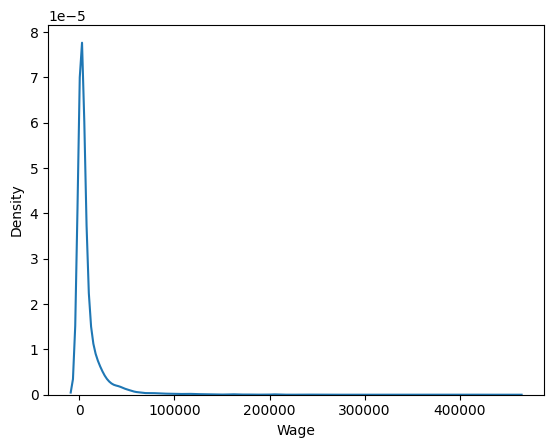

Skewness = 7.652670615176372


In [109]:
sns.kdeplot(x=df.Wage) # plots a Kernel Density Estimate (KDE) plot
plt.show()
print('Skewness =',df.Wage.skew())

In [110]:
# H0: m1 = m2 = m3 = m4 = m5
# H1: Mean wage for atleast one international reputation level is different

w1 = df[df['International Reputation']==1].Wage
w2 = df[df['International Reputation']==2].Wage
w3 = df[df['International Reputation']==3].Wage
w4 = df[df['International Reputation']==4].Wage
w5 = df[df['International Reputation']==5].Wage


In [111]:
stats.f_oneway(w1,w2,w3,w4,w5)

F_onewayResult(statistic=3460.308206312443, pvalue=0.0)

In [112]:
# pvalue < alpha 
# reject null hypothesis
# the International Reputation cause a significant effect on players' Wages

In [113]:
mc.pairwise_tukeyhsd(df['Wage'],df['International Reputation']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,26501.3869,0.0,25058.1759,27944.598,True
1.0,3.0,78443.1887,0.0,75593.2995,81293.0778,True
1.0,4.0,176152.9208,0.0,169208.7873,183097.0543,True
1.0,5.0,285132.6506,0.0,264041.2642,306224.0369,True
2.0,3.0,51941.8017,0.0,48793.0871,55090.5164,True
2.0,4.0,149651.5339,0.0,142579.5097,156723.558,True
2.0,5.0,258631.2636,0.0,237497.4255,279765.1017,True
3.0,4.0,97709.7322,0.0,90222.908,105196.5563,True
3.0,5.0,206689.4619,0.0,185413.2281,227965.6957,True
4.0,5.0,108979.7297,0.0,86781.1432,131178.3163,True


5.Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically

In [114]:
top20.Wage.skew() # slightly positively skewed

0.752960842932369

In [115]:
# H0: median <= 25000
# H1: median > 25000
stats.wilcoxon(top20.Wage-25000,alternative='greater')

WilcoxonResult(statistic=190.0, pvalue=6.571022226946025e-05)

In [116]:
# Hence, there
# is enough evidence to conclude that the median wage of the top 20 players is more than 25000.